<a href="https://colab.research.google.com/github/Ryan-Ray-Martin/prophet_timeseries/blob/master/VTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
# Define the ticker symbol and date range
ticker = 'VTI'
start_date = '2016-10-10'
end_date = '2024-10-10'

# Download historical data using yfinance
data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

# Reset index to convert the date index into a column
data.reset_index(inplace=True)

# Rename columns to match your desired format
data.rename(columns={
    'Date': 'datetime',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume'
}, inplace=True)

# Display the first few rows of the DataFrame
print(data.head())

[*********************100%***********************]  1 of 1 completed

    datetime        open        high         low       close  Adj Close  \
0 2016-10-10  110.540001  111.440002  110.540001  111.139999  97.075485   
1 2016-10-11  110.940002  110.949997  109.239998  109.660004  95.782761   
2 2016-10-12  109.779999  110.129997  109.459999  109.790001  95.896317   
3 2016-10-13  109.010002  109.720001  108.480003  109.400002  95.555695   
4 2016-10-14  110.000000  110.320000  109.360001  109.370003  95.529480   

    volume  
0  1135000  
1  1996900  
2  1849100  
3  1986200  
4  2673900  


In [4]:
len(data)

2013

In [5]:
data.describe()

,datetime,open,high,low,close,Adj Close,volume
count,2013,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2.013000e+03
mean,2020-10-08 23:18:30.581222144,180.692176,181.651480,179.561540,180.686572,171.025047,3.402939e+06
min,2016-10-10 00:00:00,106.889999,107.510002,106.690002,106.790001,93.275970,6.705000e+05
25%,2018-10-09 00:00:00,141.199997,141.979996,140.389999,141.190002,127.983261,2.261300e+06
50%,2020-10-08 00:00:00,175.039993,176.139999,173.509995,174.940002,164.288666,2.946700e+06
75%,2022-10-07 00:00:00,217.910004,218.679993,216.360001,217.720001,210.583389,3.925500e+06
max,2024-10-09 00:00:00,284.269989,284.739990,282.260010,284.500000,284.500000,2.227240e+07
std,NaN,45.106105,45.320442,44.839894,45.098109,48.641921,1.990472e+06


In [6]:
# Select only the important features i.e. the date and price
data = data[["datetime","close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"datetime":"ds","close":"y"}) #renaming the columns of the dataset
data.tail(5)

,ds,y
2008,2024-10-03,280.040009
2009,2024-10-04,282.750000
2010,2024-10-07,280.170013
2011,2024-10-08,282.529999
2012,2024-10-09,284.500000


In [7]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

DEBUG:cmdstanpy:input tempfile: /tmp/tmpm8cgib4s/xvtakaa0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm8cgib4s/5wv58t6z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72587', 'data', 'file=/tmp/tmpm8cgib4s/xvtakaa0.json', 'init=/tmp/tmpm8cgib4s/5wv58t6z.json', 'output', 'file=/tmp/tmpm8cgib4s/prophet_modelzxxwfh1d/prophet_model-20241014010330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:03:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:03:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


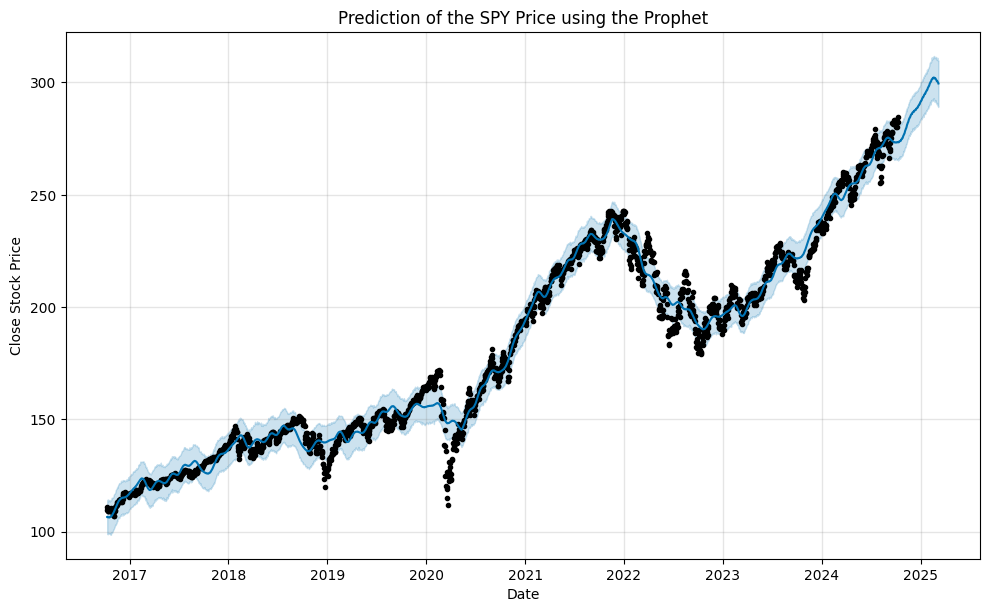

In [8]:
future = m.make_future_dataframe(periods=150) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the SPY Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

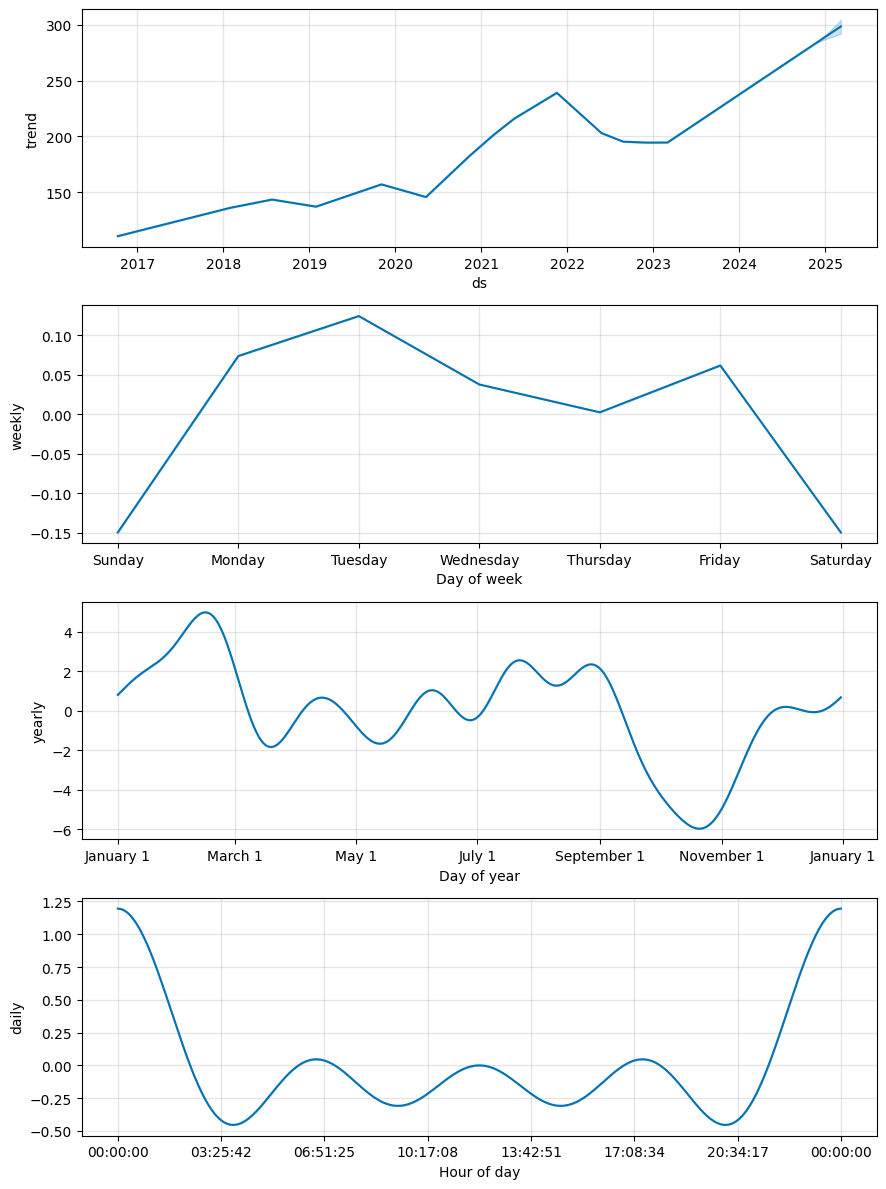

In [9]:
m.plot_components(prediction)
plt.show()